In [1]:
import pydicom
import numpy as np
import matplotlib.pyplot as plt

### Import the dicom file

In [2]:
filename = 'P5_157.dcm'

### Read its DataStructure

In [3]:
ds = pydicom.read_file(filename)

### Obtain the pixel_array from DataStructure

In [4]:
pixels = ds.pixel_array

### the image looks like this:

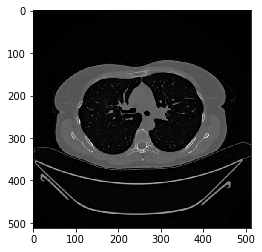

In [5]:
plt.imshow(pixels, cmap=plt.cm.gist_gray)

### Currently, our pixel_array is 16-bit and it's maximum value is 2791

In [6]:
print(pixels.dtype)
print(pixels.max())

uint16
2791


### Let's store our min and max values for further implementation in normalization formula

In [7]:
max_val = pixels.max()
min_val = pixels.min()
print('max ', max_val, ' min ', min_val)

max  2791  min  0


### nwl (NORMALIZED WITH LIBRARY) is a blank array for future population with normalized data

In [8]:
nwl = np.ndarray(shape = pixels.shape)

### import the MinMaxScaler, scale the whole pixels array and stick it into nwl

In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,255))
nwl = scaler.fit_transform(pixels)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype uint16 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [10]:
# let's take a look at the min max values
max_val = nwl.max()
min_val = nwl.min()
print('max ', max_val, ' min ', min_val)

max  255.00000000000003  min  0.0


### now it is a time to visualize the output

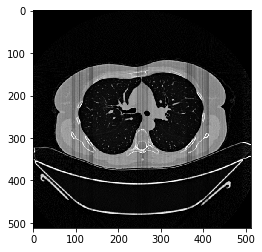

In [11]:
plt.imshow(nwl, cmap=plt.cm.gist_gray)

### Now, let's normalize the array manually and see if there will be any differences

### nm (NORMALIZED MANUALLY) is a blank array for future population with manual normalized data

In [12]:
nm = np.ndarray(shape = pixels.shape)
nm.fill(0)
nm.max()

0.0

#### The formula for manual normalization in the range between two values can be found here:
https://stats.stackexchange.com/questions/25894/changing-the-scale-of-a-variable-to-0-100
#### we will define some constants beforehand

In [13]:
max_new = 255
min_new = 0
coeff = (max_new-min_new) / (max_val-min_val)

In [14]:
max_val = pixels.max()
min_val = pixels.min()
print('max ', max_val, ' min ', min_val)

max  2791  min  0


In [15]:
# normalization loop
for i,j in np.ndenumerate(pixels):
    nm[i[0],i[1]] = ( np.float(j) - np.float(max_val) ) * coeff + max_new

In [16]:
# let's take a look at the min max values
max_val = nm.max()
min_val = nm.min()
print('max ', max_val, ' min ', min_val)

max  255.0  min  -2535.9999999999995


### The output for manual normalization looks way more better

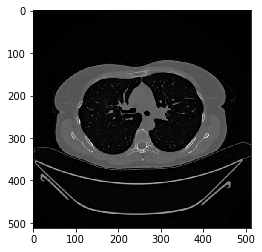

In [19]:
plt.imshow(nm, cmap=plt.cm.gist_gray)

In [20]:
plt.imsave(fname = 'normalized_with_lib.png', arr= nwl, format = 'png', dpi = 300,cmap=plt.cm.gist_gray)

plt.imsave(fname = 'original.png', arr= pixels, format = 'png', dpi = 300,cmap=plt.cm.gist_gray)

plt.imsave(fname = 'normalized_manually.png', arr = nm, format = 'png', dpi = 300,cmap=plt.cm.gist_gray)